In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DataSets/2022_forbes_billionaires (1).csv")

In [3]:
df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


## Data Preparation

## How can we handle missing values in the dataset?

In [4]:
df.isnull().sum()  #checking missing values or null values

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

In [5]:
df.networth=df.networth.replace("[$ B]","",regex=True).astype('float64') #to convert data types and replacing

In [6]:
df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


## Basic statistics such as mean, median , min, max, sd


In [30]:
df.describe() #for numeric parameters ,----- df.describe() this code is used when want to apply on object
# describe func is applied on whole dataset but it performs on numerical columns  

,Unnamed: 0,rank,networth,age
count,2600.000000,2600.000000,2600.000000,2600.000000
mean,1299.500000,1269.570769,4.860750,64.271923
std,750.699674,728.146364,10.659671,13.220607
min,0.000000,1.000000,1.000000,19.000000
25%,649.750000,637.000000,1.500000,55.000000
50%,1299.500000,1292.000000,2.400000,64.000000
75%,1949.250000,1929.000000,4.500000,74.000000
max,2599.000000,2578.000000,219.000000,100.000000


## The avg networth of billionaire is 4.86 billion dollar with median of 2.4 billion dolllar .Age ranges from 19 to 100 averaging around 64 yrs

In [8]:
df.networth.median() #to check median,50% is median

2.4

## Distribution of billionaire networth in histogram

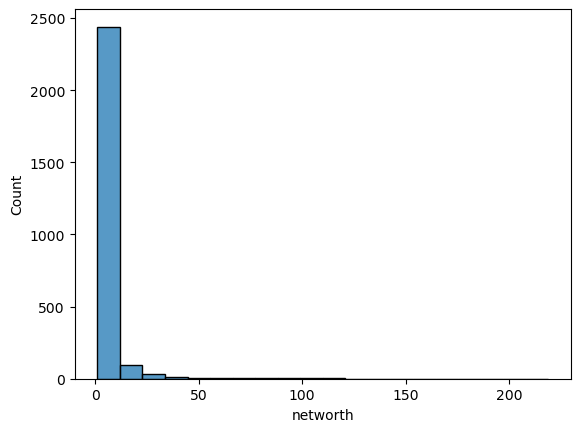

In [9]:
sb.histplot(x=df.networth,bins=20) #histogramsss
plt.show()

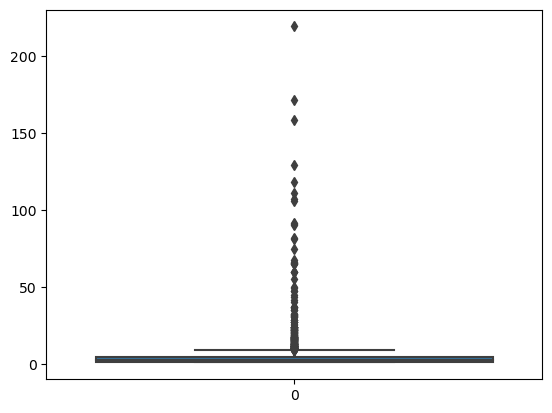

In [10]:
sb.boxplot(df.networth)  # boxplot 
plt.show()
#appearence of boxplot is like this bcoz networth can be anything it has no range 
#if age would be used then then outliers will be seen

## Find the top 10 billionaire based on networth

In [11]:
a1=df.groupby('name')['networth'].sum().nlargest(10)  # to show top 10 names 

In [12]:
a1

name
Elon Musk                    219.0
Jeff Bezos                   171.0
Bernard Arnault & family     158.0
Bill Gates                   129.0
Warren Buffett               118.0
Larry Page                   111.0
Sergey Brin                  107.0
Larry Ellison                106.0
Steve Ballmer                 91.4
Mukesh Ambani                 90.7
Name: networth, dtype: float64

## Elon Musk tops the list of billionaires  followed by jeff bezos, bernard arnault, bill gate and so on rounding out the top with Mukesh Ambani

## Find top 10 countries with highest billionaire count

In [13]:
a=df.country.value_counts().nlargest(10)

## Top 10 countries with highest billionaire count are are USA ,China, India followed by Germany,Russia , Hong Kong,Canada,Brazil and lowest 2 are Italy and Taiwan

In [14]:
a

country
United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: count, dtype: int64

## Display the billionaire wealth across different countries 

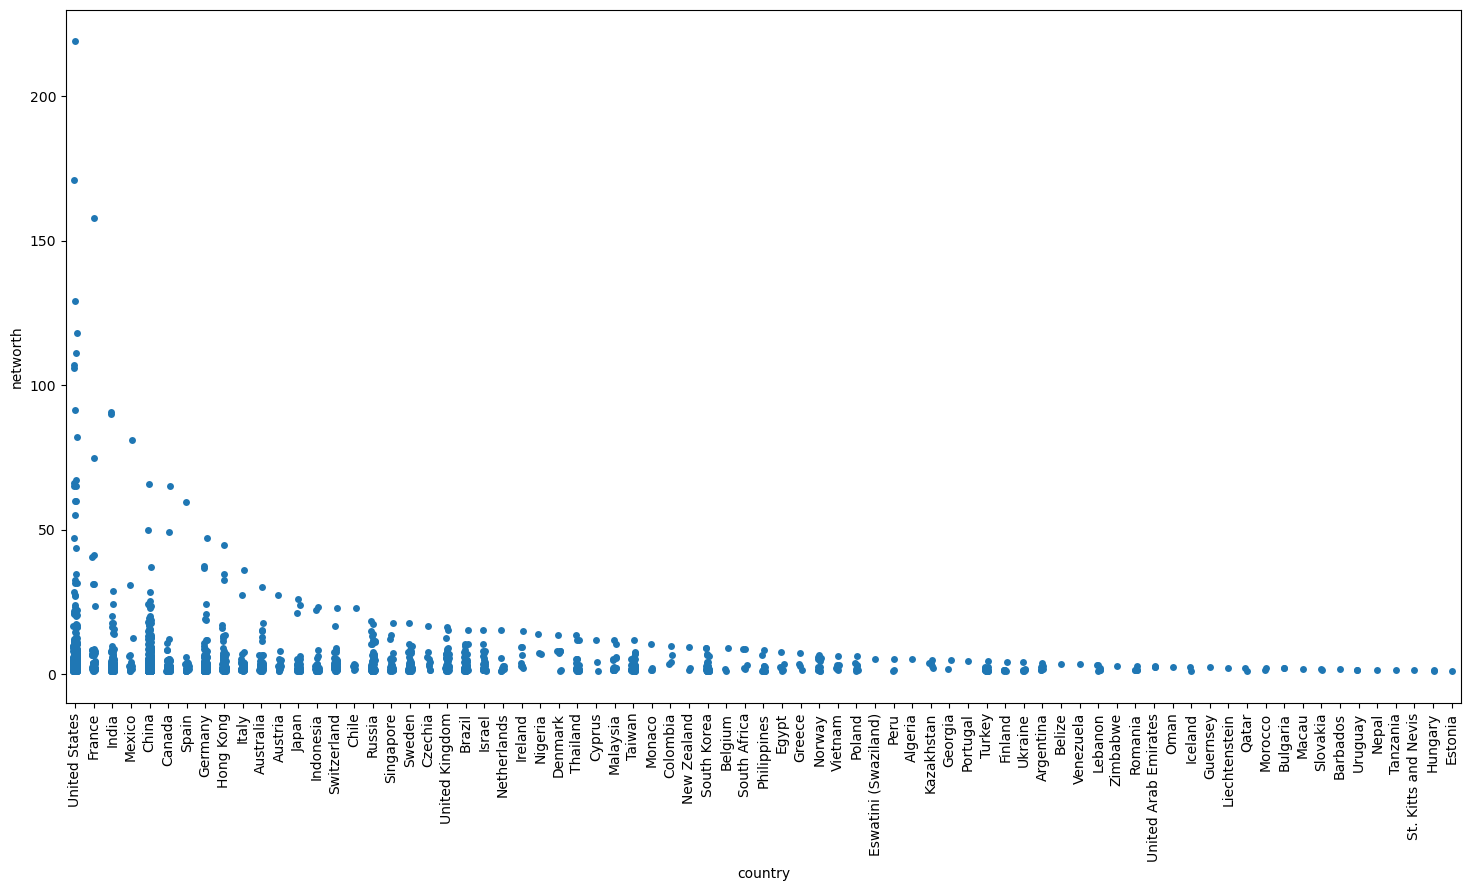

In [15]:
plt.figure(figsize=(18,9)) ##figure to control the size plots 
sb.stripplot(x=df.country,y=df.networth)
plt.xticks(rotation=90)
plt.show()

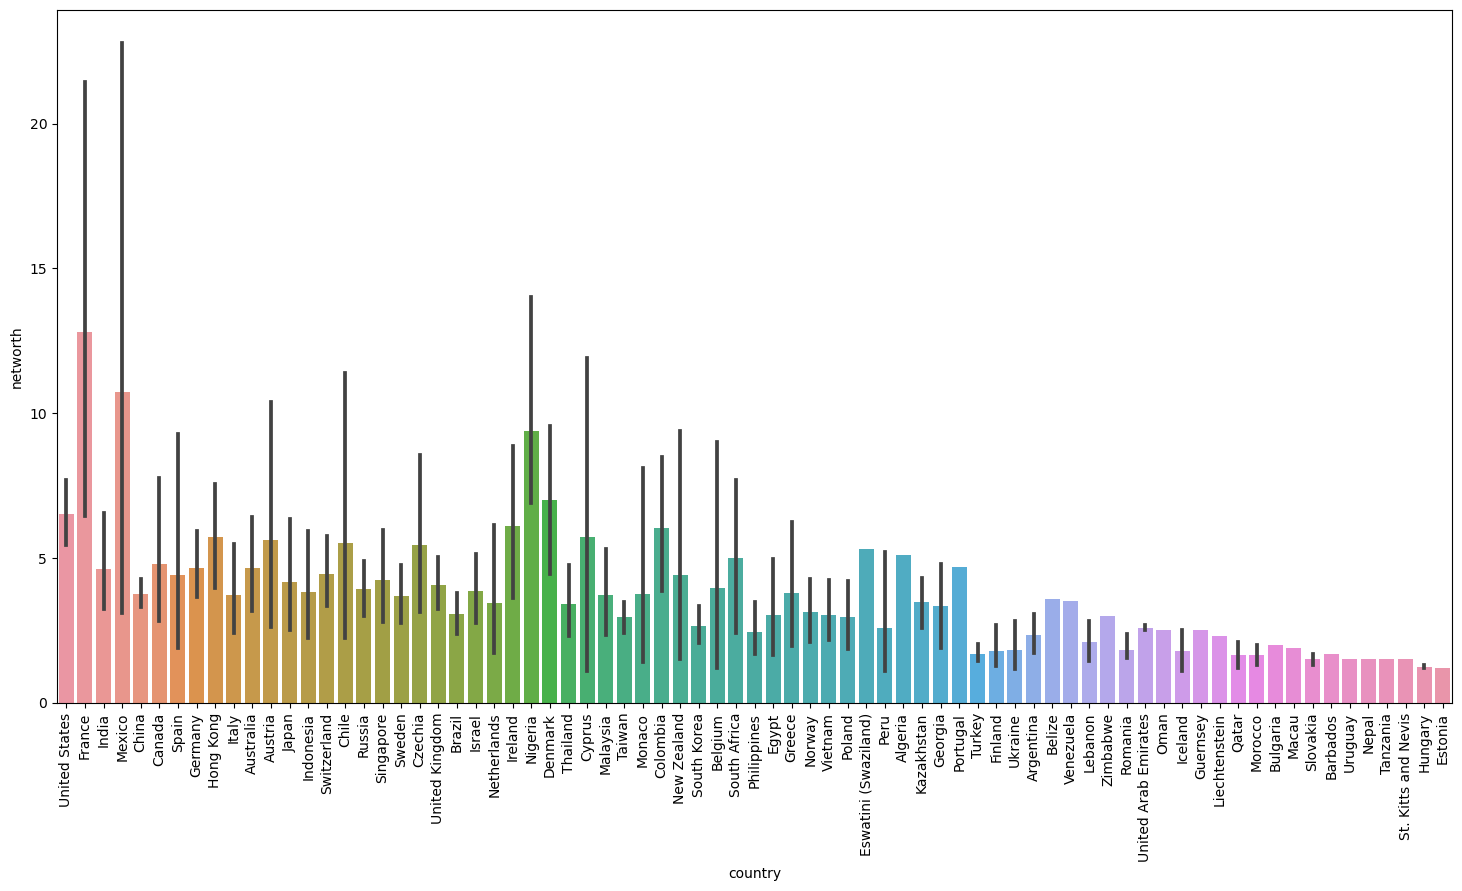

In [16]:
plt.figure(figsize=(18,9))  #when figure figsize is  used to define the size of figure in (length,width)
sb.barplot(x=df.country,y=df.networth) ###extraaa,this barplot is an option for stripplot abovee
plt.xticks(rotation=90) ##used to rotate the labels on x-axis to improve readability
plt.show()

## The chart shows that the United states ,China and India lead in billionaire wealth followed by countries like Germany,Russia , and Hong Kong while may other nations have significantly fewer billionaires

## Find the industries that produce the highest number of billionaires

In [17]:
b=df.industry.value_counts().nlargest(5)

## Finance & Investments produces the large number of billionaire followed by Technology , Manufacturing, Fashion & Retail and Healthcare 

In [18]:
b

industry
Finance & Investments     386
Technology                329
Manufacturing             322
Fashion & Retail          246
Healthcare                212
Name: count, dtype: int64

## What is the avg networth per industry?

In [19]:
a2=df.groupby('industry')['networth'].mean().reset_index() #reset index se table ban jaega parameters ka

## Here's the list of avg networth as per industries

In [20]:
a2

,industry,networth
0,Automotive,8.443478
1,Construction & Engineering,2.811628
2,Diversified,5.278090
3,Energy,4.250538
4,Fashion & Retail,6.557724
5,Finance & Investments,4.493005
6,Food & Beverage,4.643532
7,Gambling & Casinos,4.678261
8,Healthcare,3.343868
9,Logistics,5.605714


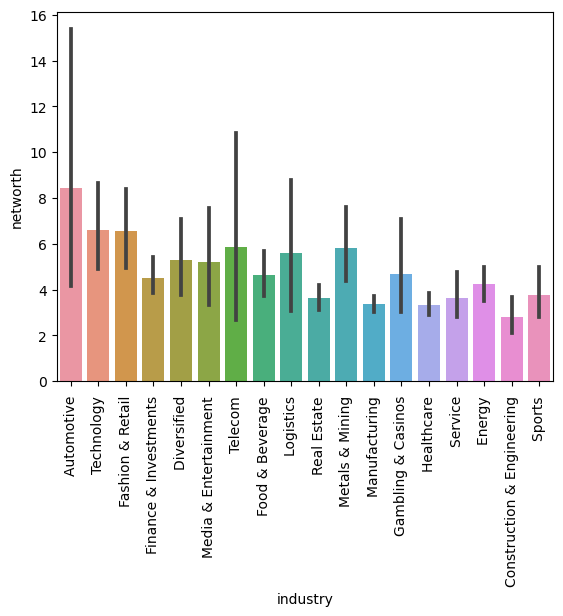

In [21]:
sb.barplot(x=df.industry,y=df.networth) ## upar reset index kiya isliye index aur values ka use nhi kiya barplot bnane k liye
plt.xticks(rotation=90)
plt.show()

## The networth of automotive industry is the highest technology and fashion & retail has the same networth and the industry with lowest networth is Construction & Engineering

## calculate the mean of age

In [22]:
df.age.mean()

64.27192307692307

## 64.2719 is the mean of age column

## Find the median of age

In [23]:
df.age.median()

64.0

## 64.0 is median  

In [24]:
df.age.describe() ## OR / extra for above

count    2600.000000
mean       64.271923
std        13.220607
min        19.000000
25%        55.000000
50%        64.000000
75%        74.000000
max       100.000000
Name: age, dtype: float64

In [25]:
a1=df[['age','networth']]
a1

,age,networth
0,50,219.0
1,58,171.0
2,73,158.0
3,66,129.0
4,91,118.0
...,...,...
2595,80,1.0
2596,82,1.0
2597,71,1.0
2598,68,1.0


## Find the age of oldest billionare 

In [26]:
df.age.nlargest(1)

1681    100
Name: age, dtype: int64

## 100 is the age of oldest billionaire

## Here's the name and details of oldest billionaire 

In [27]:
df.loc[1681] #id in bracket

Unnamed: 0                      1681
rank                            1645
name                  George Joseph 
networth                         1.8
age                              100
country                United States
source                     insurance
industry      Finance & Investments 
Name: 1681, dtype: object

## Find the age of youngest  billionaire

In [28]:
df.age.nsmallest(1)

1311    19
Name: age, dtype: int64

## 19 is the age of youngest billionaire

## Here's the details of youngest billionaire

In [29]:
df.loc[1311]

Unnamed: 0                    1311
rank                          1292
name          Kevin David Lehmann 
networth                       2.4
age                             19
country                    Germany
source                  drugstores
industry         Fashion & Retail 
Name: 1311, dtype: object